# The Beta Distribution

Import necessary libraries:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import preliz as pz
from scipy import stats

plt.style.use('ggplot')

## Using Scipy

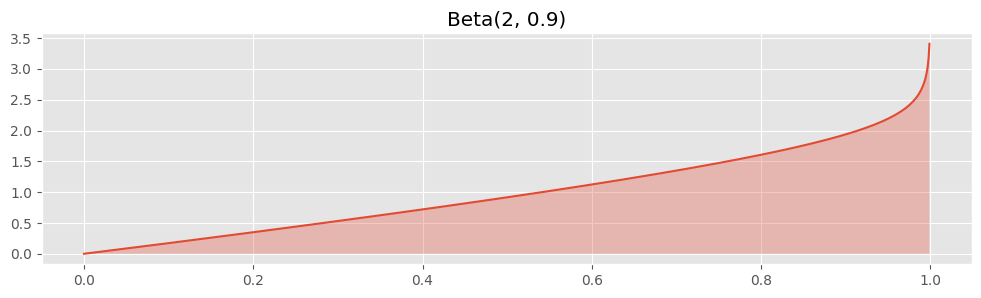

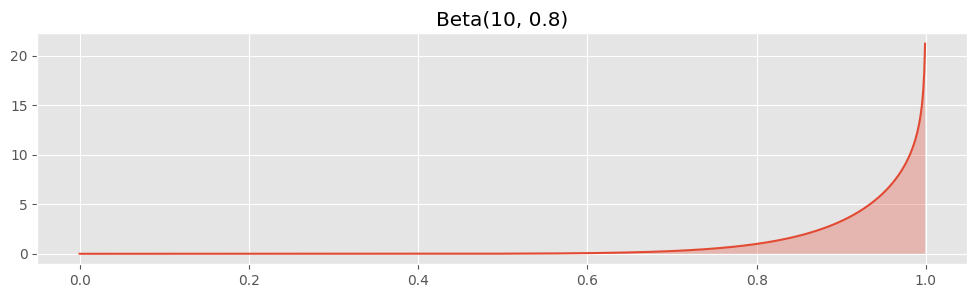

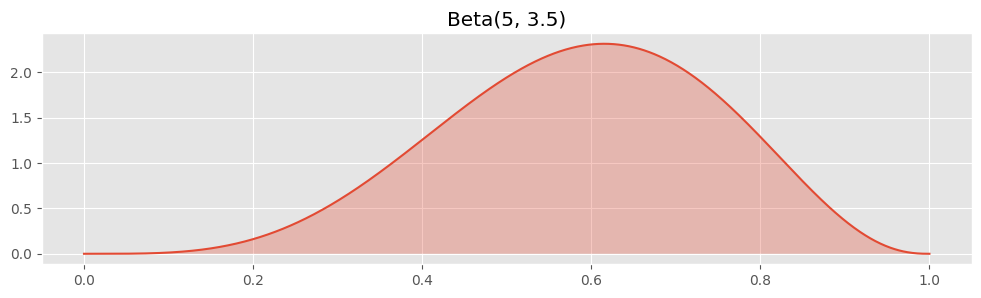

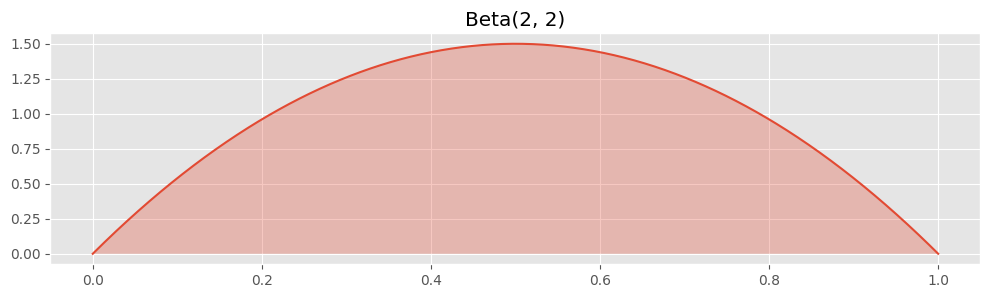

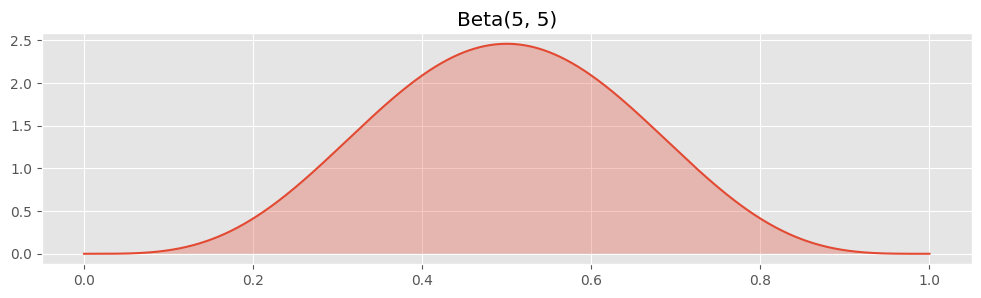

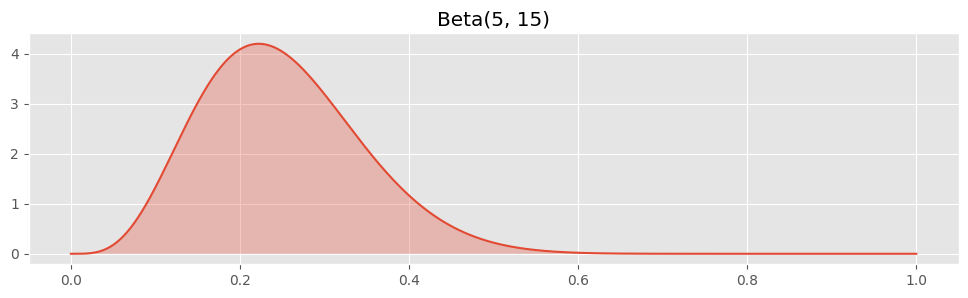

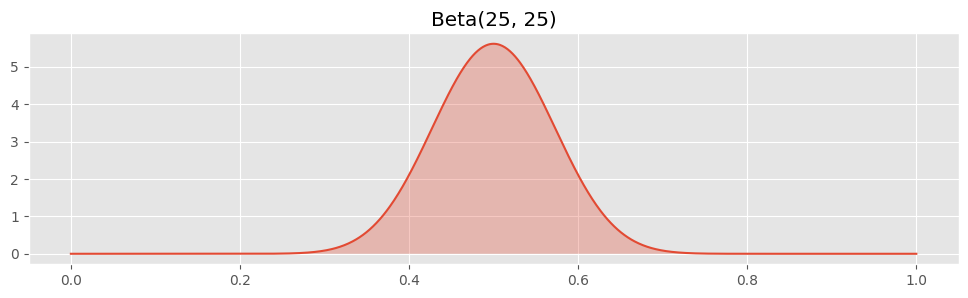

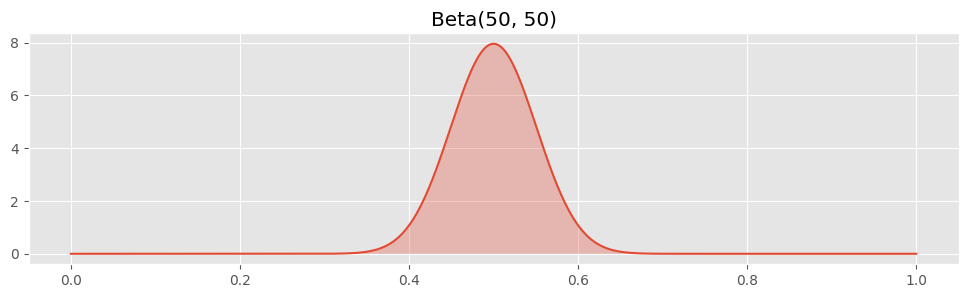

In [16]:
def plot_beta(alpha, beta, figsize=(12, 3)):
    pi_range = np.linspace(0, 1, 1000)
    prob = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]

    plt.figure(figsize=figsize)
    plt.plot(pi_range, prob)
    plt.fill_between(pi_range, prob, alpha=0.3)
    plt.title("Beta({}, {})".format(alpha, beta))


plot_beta(2, 0.9)
plot_beta(10, 0.8)
plot_beta(5, 3.5)
plot_beta(2, 2)
plot_beta(5, 5)
plot_beta(5, 15)
plot_beta(50, 50)

## Array for different values of $\alpha$ and $\beta$

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Dave\AppData\Local\Temp\ipykernel_26372\171554121.py:14: SyntaxWarning: invalid escape sequence '\p'
  if j==0: plt.xlabel("$\pi$")


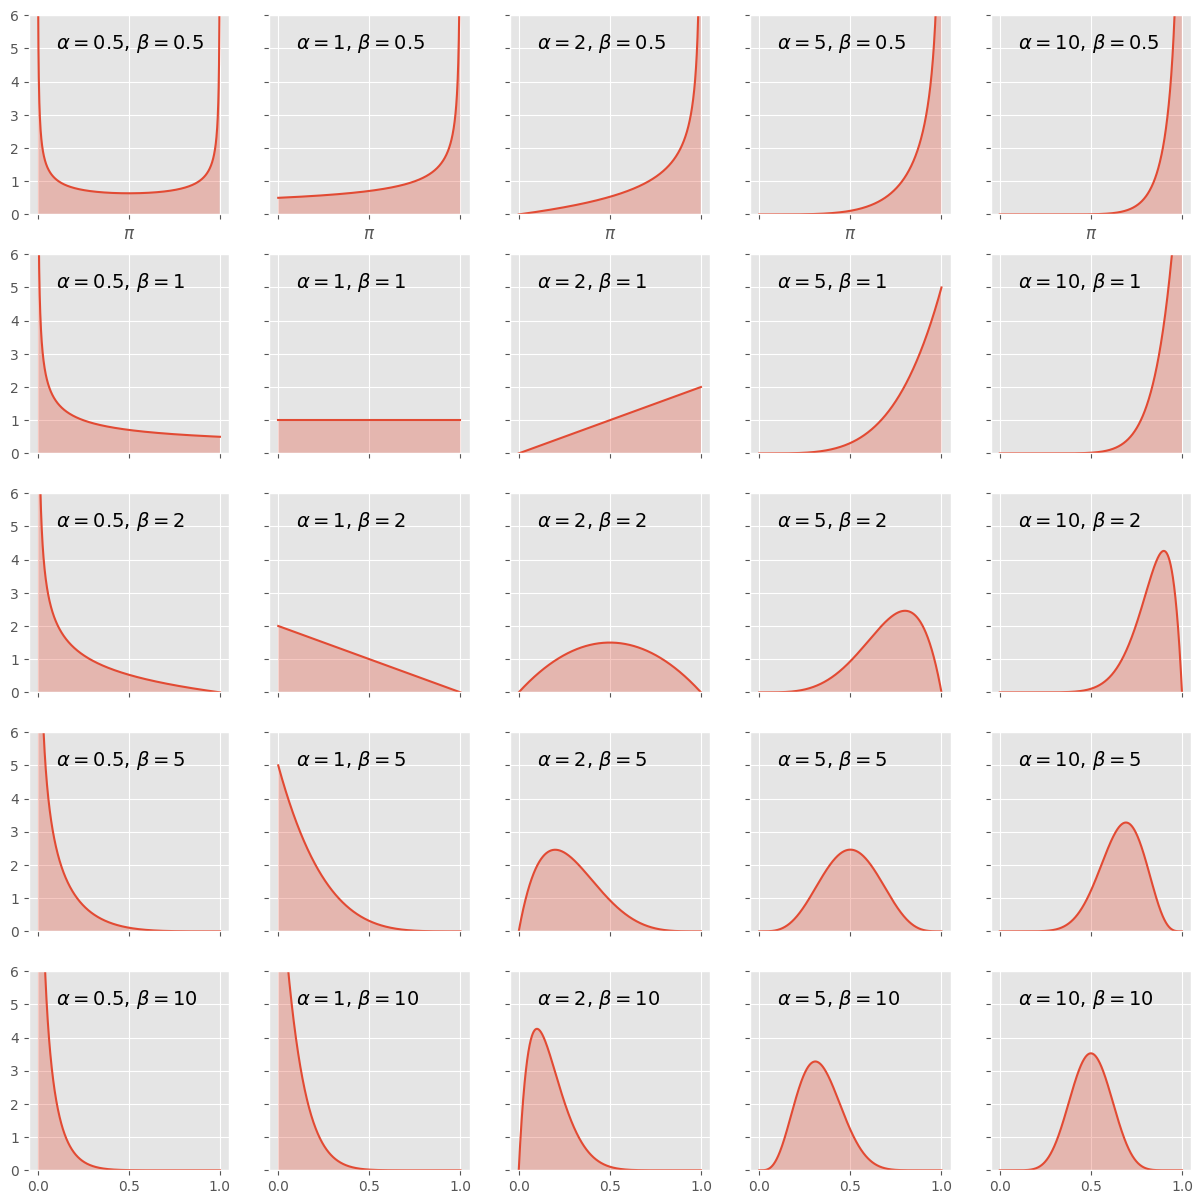

In [6]:
alpha_beta_range = [0.5, 1, 2, 5, 10]
n = len(alpha_beta_range)

fig, ax = plt.subplots(n, n, figsize=(15, 15), sharex=True, sharey=True)
for i in range(n):
    for j in range(n):
        plt.sca(ax[j, i])

        pi_range = np.linspace(0, 1, 1000)
        prob = [stats.beta.pdf(pi, a=alpha_beta_range[i], b=alpha_beta_range[j]) for pi in pi_range]
        plt.plot(pi_range, prob)
        plt.ylim([0, 6])
        plt.fill_between(pi_range, prob, alpha=0.3)
        if j == 0: plt.xlabel("$\pi$")
        #if i==n-1: plt.ylabel("$p(\pi)$")
        plt.text(0.1, 5, "$\\alpha={}$, $\\beta={}$".format(alpha_beta_range[i], alpha_beta_range[j]), fontsize=14)

## Plot using PreliZ

<Axes: >

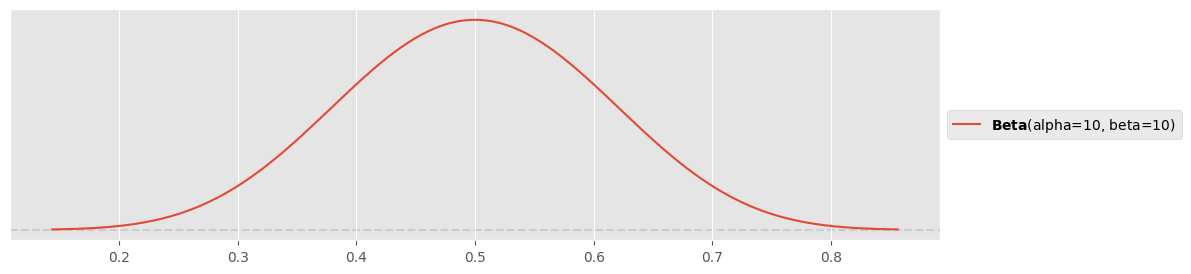

In [17]:
pz.Beta(10, 10).plot_pdf(figsize=(12, 3))

## Interactive plot using PreliZ

$
\displaystyle{E[\pi] = \frac{\alpha}{\alpha+\beta}}
$

$
\displaystyle{\text{Var}[\pi] = \frac{\alpha\beta}{(\alpha+\beta)^2\;(\alpha+\beta+1)}}
$

In [8]:
pz.Beta(10, 10).plot_interactive(figsize=(12, 3))

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

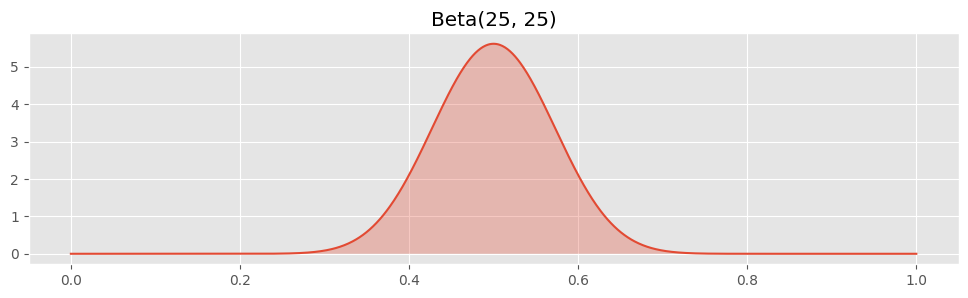

In [18]:
plot_beta(25, 25)

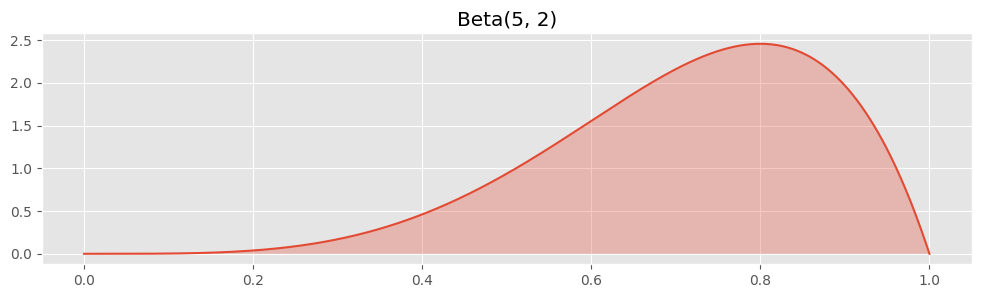

In [19]:
plot_beta(5, 2)


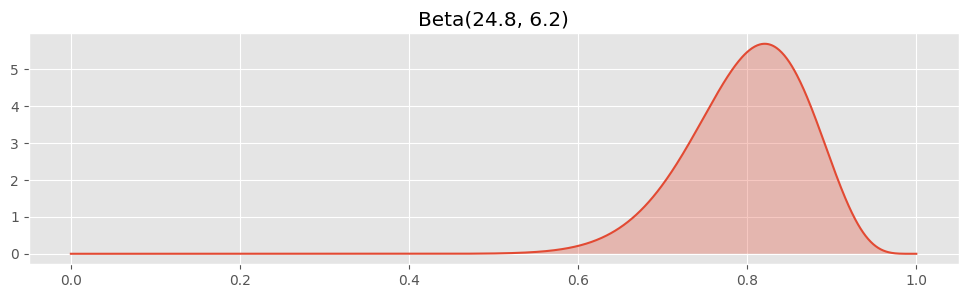

In [22]:
# Exercise 1
plot_beta(24.8,6.2)